In [16]:
import os

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
sns.set()
sns.set_context("paper", font_scale=1.2)

In [18]:
df = pd.read_csv("matching_scores.csv")
# drop the first column
df = df.drop(df.columns[0], axis=1)
# set the index to the file_name
df = df.set_index('file_name')
df.index = df.index.map(lambda x: x[x.rfind('/') + 1:])

In [19]:
# get the list of files in folder that is .png
files = [file for file in os.listdir('.') if file.endswith('.png')]
files = sorted(files)
files_idx = list(range(len(files)))
# df_best replace file_name with index mapped
df['file_name'] = df.index.map(lambda x: files_idx[files.index(x)])
df['file_name_string'] = df.index
df.reset_index(inplace=True, drop=True)

In [20]:
df['unique_index'] = df.index

In [21]:
df_copy = df
df_best = df_copy.sort_values(by='max_val').groupby('file_name').last()
df_best['pitch_diff'] = df_best['pitch'].diff().abs()
df_best['pitch_diff'][0] = df_copy.iloc[-1]['pitch'] - df_copy.iloc[0]['pitch']
df_best['pitch_diff'] = df_best['pitch_diff'].apply(lambda x: x if x < 180 else 360 - x)

/var/folders/cr/fk05n77x7l59vt1zwmvrl4yc0000gn/T/ipykernel_63579/3878040909.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best['pitch_diff'][0] = df_copy.iloc[-1]['pitch'] - df_copy.iloc[0]['pitch']


/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

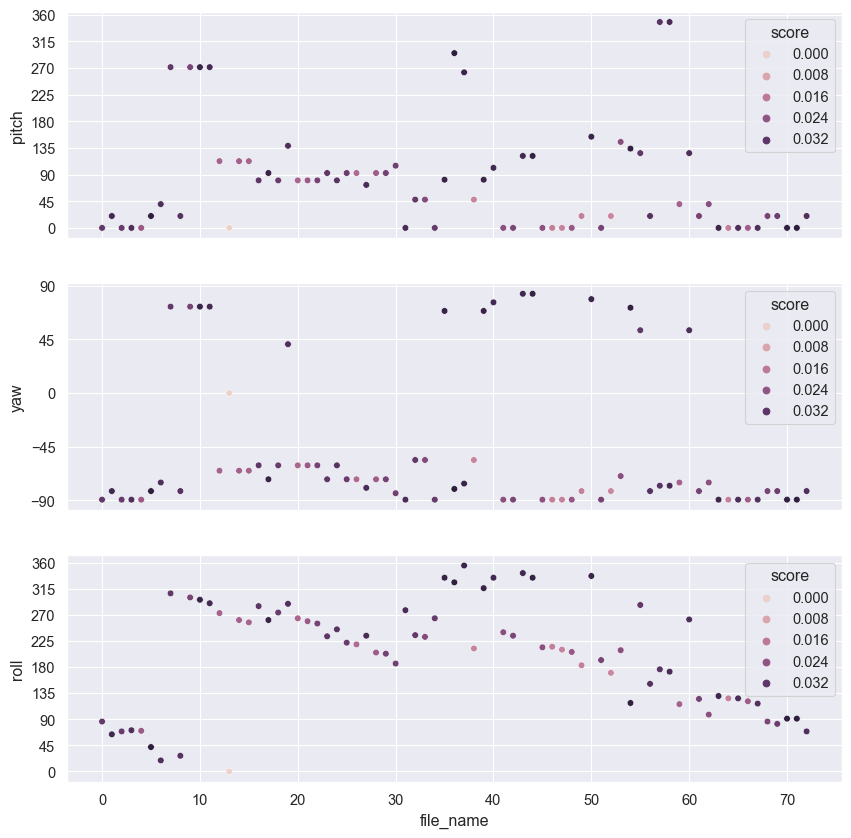

In [22]:
# plot roll, pitch, yaw in subplots with score as hue and file_name as x
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
sns.scatterplot(ax=axes[0], data=df_best, x='file_name', y='pitch', hue='score');
axes[0].set_yticks(range(0, 361, 45));
sns.scatterplot(ax=axes[1], data=df_best, x='file_name', y='yaw', hue='score');
axes[1].set_yticks(range(-90, 91, 45));
sns.scatterplot(ax=axes[2], data=df_best, x='file_name', y='roll', hue='score');
axes[2].set_yticks(range(0, 361, 45));

In [23]:
df_copy.sort_values(by='max_val').groupby('file_name').last()

,rotation,max_val,rotation_reverse,max_val_reverse,translation,x,y,z,score,reversed_diff,...,channel,roll,pitch,yaw,channel_reverse,roll_reverse,pitch_reverse,yaw_reverse,file_name_string,unique_index
file_name,,,,,,,,,,,,,,,,,,,,,
0,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",150.962809,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",147.737478,"x: 0.98, y: 0.01, z: 21.52",0.981007,0.008932,21.522750,0.031051,-3.225331,...,rg,86,0.000,-89.55,rg,86,0.000,-89.55,A240105_15331309.png,10
1,"pitch/theta/X: 20.06, yaw/phi/Y: -82.35, roll/...",140.191562,"pitch/theta/X: 20.06, yaw/phi/Y: -82.35, roll/...",138.883563,"x: 0.96, y: -0.05, z: 21.68",0.960086,-0.053976,21.677271,0.035861,-1.308000,...,rb,64,20.062,-82.35,rb,64,20.062,-82.35,A240105_15341532.png,1904
2,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",149.674802,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",149.952651,"x: 0.95, y: -0.12, z: 21.67",0.950651,-0.116935,21.674666,0.030430,0.277850,...,rg,69,0.000,-89.55,rg,69,0.000,-89.55,A240105_15344411.png,101
3,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",147.374342,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",144.803674,"x: 0.92, y: -0.16, z: 21.55",0.917580,-0.161013,21.554616,0.033819,-2.570667,...,rg,71,0.000,-89.55,rg,71,0.000,-89.55,A240105_15350958.png,2006
4,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",158.512421,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",155.504950,"x: 0.90, y: -0.22, z: 21.55",0.898685,-0.223540,21.546021,0.022423,-3.007471,...,rg,70,0.000,-89.55,rg,70,0.000,-89.55,A240105_15353664.png,176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,"pitch/theta/X: 20.06, yaw/phi/Y: -82.35, roll/...",143.385903,"pitch/theta/X: 20.06, yaw/phi/Y: -82.35, roll/...",142.348686,"x: 0.91, y: 0.23, z: 21.90",0.913289,0.227173,21.896169,0.027936,-1.037216,...,rb,86,20.062,-82.35,rb,86,20.062,-82.35,A240105_16051481.png,1622
69,"pitch/theta/X: 20.06, yaw/phi/Y: -82.35, roll/...",137.154008,"pitch/theta/X: 20.06, yaw/phi/Y: -82.35, roll/...",136.238167,"x: 0.94, y: 0.17, z: 21.78",0.936334,0.171698,21.775214,0.029729,-0.915841,...,rb,82,20.062,-82.35,rb,82,20.062,-82.35,A240105_16054076.png,3519
70,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",144.479843,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",143.229152,"x: 0.93, y: 0.12, z: 21.42",0.930329,0.115568,21.421344,0.038324,-1.250692,...,rg,91,0.000,-89.55,rg,91,0.000,-89.55,A240105_16060703.png,3595


In [24]:
# while True:
#     df_best = df_copy.sort_values(by='max_val').groupby('file_name').last()
#     df_best['pitch_diff'] = df_best['pitch'].diff().abs()
#     df_best.iloc[0]['pitch_diff'] = df_copy.iloc[-1]['pitch'] - df_copy.iloc[0]['pitch']
#     df_best['pitch_diff'] = df_best['pitch_diff'].apply(lambda x: x if x < 180 else 360 - x)
#
#     if df_best['pitch_diff'].max() < 40:
#         break
#     else:
#         # find the first index which has pitch_diff > 40
#         # idx = df_best[df_best['pitch_diff'] > 40].index[0]
#         idx = df_best['pitch_diff'].idxmax()
#         unique = df_best.loc[idx]['unique_index']
#         df_copy = df_copy.drop(unique)

In [25]:
len(df_best.index.unique())

73

In [26]:
# only keep 'file_name', 'score', 'pitch', 'yaw', 'roll' columns
df_small = df_best[['file_name_string', 'score', 'pitch', 'yaw', 'roll', 'x', 'y', 'z', 'channel', 'max_val']]

/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

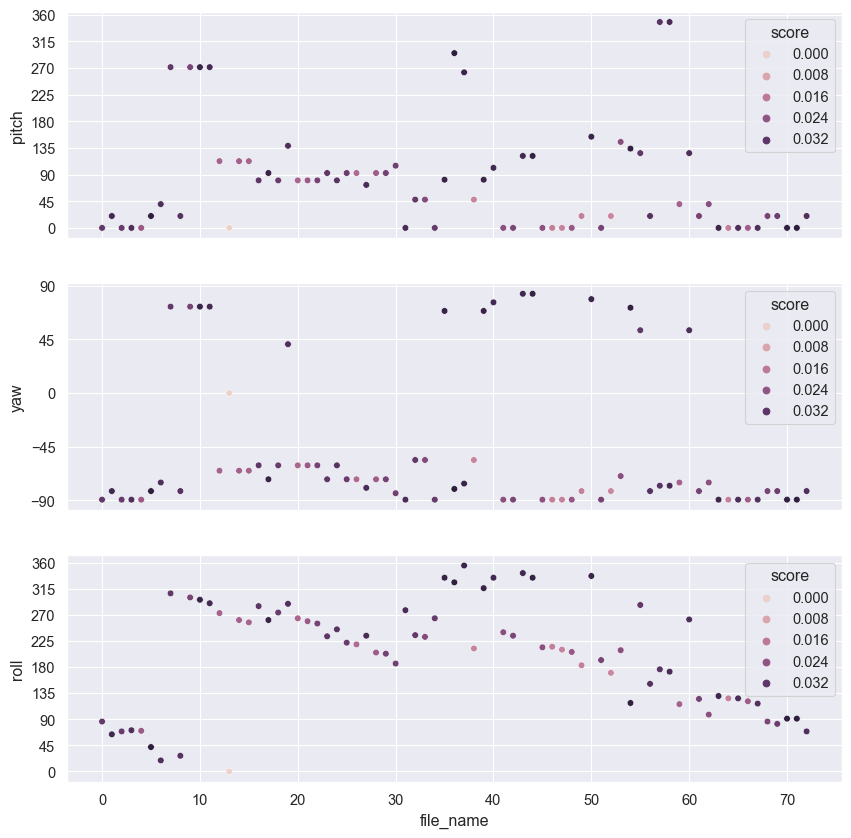

In [27]:
# plot roll, pitch, yaw in subplots with score as hue and file_name as x
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
sns.scatterplot(ax=axes[0], data=df_best, x='file_name', y='pitch', hue='score');
axes[0].set_yticks(range(0, 361, 45));
sns.scatterplot(ax=axes[1], data=df_best, x='file_name', y='yaw', hue='score');
axes[1].set_yticks(range(-90, 91, 45));
sns.scatterplot(ax=axes[2], data=df_best, x='file_name', y='roll', hue='score');
axes[2].set_yticks(range(0, 361, 45));

In [28]:
df_small['roll'].diff().describe()

count     72.000000
mean      -0.236111
std       93.391270
min     -280.000000
25%      -23.000000
50%       -4.000000
75%       15.000000
max      288.000000
Name: roll, dtype: float64

/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


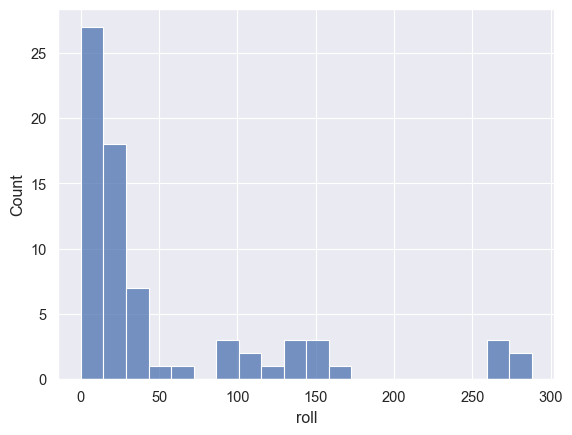

In [29]:
# find delta values for roll
# plot as histogram absoulte values
sns.histplot(df_small['roll'].diff().abs(), bins=20);

In [30]:
df_small.drop(['channel', 'max_val'], axis=1).to_csv("best_scores.csv")